# HV Breakdown Strength Calculation with PyBoltz

This notebook reproduces the calculation detailed in the paper "Dielectric Strength of Noble and Quenched Gases for High Pressure Time Projection Chambers"  by L. Norman, K. Silva, B.J.P. Jones, A.D. McDonald, M. R. Tiscareno and K. Woodruff

It can be used to calculate the HV breakdown strength of gases and mixtures according to PyBoltz-augmented Townsend or Meek criteria.

This calculation takes around 45 minutes ro run on a 2017 MacBook Pro.

In [1]:
import numpy as np
import pylab
import time
from pathlib import Path
from scipy.optimize import minimize
import pandas as pd

from scipy import interpolate
from PyBoltz.PyBoltzRun import *

In [2]:
# Set up helper object
PBRun=PyBoltzRun()

# Show list of available gases
PBRun.ListGases()

CF4 1
ARGON 2
HELIUM4 3
HELIUM3 4
NEON 5
KRYPTON 6
XENON 7
CH4 8
ETHANE 9
PROPANE 10
ISOBUTANE 11
CO2 12
H2O 14
OXYGEN 15
NITROGEN 16
HYDROGEN 21
DEUTERIUM 22
DME 25


In [3]:
# Set the pressure 
p = 750.062

# Configure settings for our simulation - 
#  here you can pick your gas mix!
MySettings   ={'Gases'                 :['ARGON'],
               'Fractions'             :[100],
               'Max_collisions'        :4e7,
               'EField_Vcm'            :100,
               'Max_electron_energy'   :0,
               'Temperature_C'         :23,
               'Pressure_Torr'         :p,
               'BField_Tesla'          :0,
               'BField_angle'          :0,
               'Angular_dist_model'    :2,
               'Enable_penning'        :0,
               'Enable_thermal_motion' :1,
               'ConsoleOutputFlag'     :0}

In [4]:
# Create empty lists to store outputs

TownsendAlpha=[]
Attachment=[]
TownsendAlpha_err=[]
Attachment_err=[]


In [5]:
# Run PyBoltz for each E field and extract ionization and attachment coefficients

EFields=np.logspace(3,6,40)
t1=time.time()
for E in EFields:
    print("Running with E Field " +str(E))

    MySettings['EField_Vcm']=E
    
    Output=PBRun.Run(MySettings)
    
    TownsendAlpha.append(Output['ReducedIonization'].val)
    TownsendAlpha_err.append(Output['ReducedIonization'].err)

 
    Attachment.append(Output['ReducedAttachment'].val)
    Attachment_err.append(Output['ReducedAttachment'].err)
    
t2=time.time()

print("Time elapsed:" +str(t2-t1))

Running with E Field 1000.0
Input Decor_Colls not set, using default 0
Input Decor_LookBacks not set, using default 0
Input Decor_Step not set, using default 0
Input NumSamples not set, using default 10

Running with E Field 1125.3355826007646

Running with E Field 1266.3801734674034

Running with E Field 1425.1026703029977

Running with E Field 1603.718743751331

Running with E Field 1804.7217668271703

Running with E Field 2030.9176209047348

Running with E Field 2285.4638641349907

Running with E Field 2571.913809059344

Running with E Field 2894.2661247167516

Running with E Field 3257.020655659783

Running with E Field 3665.241237079626

Running with E Field 4124.626382901352

Running with E Field 4641.588833612777

Running with E Field 5223.345074266843

Running with E Field 5878.0160722749115

Running with E Field 6614.740641230146

Running with E Field 7443.803013251689

Running with E Field 8376.776400682917

Running with E Field 9426.684551178854

Running with E Field 10608.1


Solution for Steady State Townsend parameters
Space step between sampling planes = 110.53776448958544 Microns

Simulation through 8 Space planes:
 Total number of Electrons:    35973.0
 Number of Negative Ions:        0.0
 Number of primaries:        2.0

Steady state Townsend results for 8 sequential space planes
 Plane #     NEL      VD     WS     DL     DT    EBAR      ALFN       ALFNJ       ALFNE    
   1.0       8.0     53.4   57.4   167.2  493.8   5.9      0.0         0.0        125.4    
   2.0       17.0    100.4  67.3  1360.6 3211.5   6.1      11.0        68.2        68.2    
   3.0       80.0    63.7   55.9   783.5 1301.5   6.7     181.3       140.1       140.1    
   4.0      245.0    60.8   58.8  1217.7 2356.7   6.7     105.4       101.3       101.3    
   5.0      832.0    62.1   71.9  2243.5 2427.6   6.2     108.7       110.6       110.6    
   6.0      2859.0   59.1   59.4  1212.5 2560.0   6.3     116.2       111.7       111.7    
   7.0      9568.0   62.8   62.1  1323.


Solution for Steady State Townsend parameters
Space step between sampling planes = 45.34939046808558 Microns

Simulation through 8 Space planes:
 Total number of Electrons:    22600.0
 Number of Negative Ions:        0.0
 Number of primaries:        1.0

Steady state Townsend results for 8 sequential space planes
 Plane #     NEL      VD     WS     DL     DT    EBAR      ALFN       ALFNJ       ALFNE    
   1.0       3.0     152.6  126.5  250.4  550.3   8.5      0.0         0.0        242.3    
   2.0       18.0    83.6   111.0 2533.5  648.0   6.6     527.8       395.1       395.1    
   3.0       58.0    78.7   86.1   443.4 4147.9   6.5     271.4       258.0       258.0    
   4.0      199.0    85.0   85.7  1137.6 1279.1   6.3     254.8       271.9       271.9    
   5.0      609.0    76.9   80.3  1481.9 1800.1   6.6     268.9       246.6       246.6    
   6.0      1833.0   80.3   84.8  1063.5 1777.7   6.8     233.3       243.0       243.0    
   7.0      5946.0   81.3   84.3  1699.8


Solution for Steady State Townsend parameters
Space step between sampling planes = 22.03075202807114 Microns

Simulation through 8 Space planes:
 Total number of Electrons:    60411.0
 Number of Negative Ions:        0.0
 Number of primaries:        7.0

Steady state Townsend results for 8 sequential space planes
 Plane #     NEL      VD     WS     DL     DT    EBAR      ALFN       ALFNJ       ALFNE    
   1.0       17.0    108.3  94.3  1616.1 1403.6   5.9      0.0         0.0        402.8    
   2.0       52.0    135.2  114.3 4625.4 1217.6   6.9     407.0       507.5       507.5    
   3.0      183.0    103.8  127.9 -5350.32807.7   7.0     691.2       571.1       571.1    
   4.0      522.0    106.2  103.7  770.2  737.4   7.0     465.1       475.8       475.8    
   5.0      1603.0   111.9  111.7 1819.5 1633.7   7.2     485.5       509.3       509.3    
   6.0      4921.0   109.6  114.7 1159.9 1900.6   7.2     518.5       509.1       509.1    
   7.0     15170.0   109.5  114.7 1430.0


Solution for Steady State Townsend parameters
Space step between sampling planes = 11.721258658168276 Microns

Simulation through 8 Space planes:
 Total number of Electrons:   141083.0
 Number of Negative Ions:        0.0
 Number of primaries:       19.0

Steady state Townsend results for 8 sequential space planes
 Plane #     NEL      VD     WS     DL     DT    EBAR      ALFN       ALFNJ       ALFNE    
   1.0       50.0    144.4  116.3  490.7 1553.6   5.8      0.0         0.0        825.5    
   2.0      148.0    151.4  189.3 1292.3 2236.0   8.7     885.4       925.8       925.8    
   3.0      465.0    124.9  145.3 1546.0 3444.2   7.2     1141.0      976.7       976.7    
   4.0      1387.0   125.5  168.7  555.8 1970.2   8.8     928.1       932.4       932.4    
   5.0      4044.0   143.9  163.0 2651.8 1321.7   7.5     796.0       912.9       912.9    
   6.0     11558.0   143.4  155.0 1167.4 1769.5   7.6     898.9       895.9       895.9    
   7.0     33983.0   145.5  161.0 1932.


Solution for Steady State Townsend parameters
Space step between sampling planes = 6.817162863087382 Microns

Simulation through 8 Space planes:
 Total number of Electrons:   291799.0
 Number of Negative Ions:        0.0
 Number of primaries:       48.0

Steady state Townsend results for 8 sequential space planes
 Plane #     NEL      VD     WS     DL     DT    EBAR      ALFN       ALFNJ       ALFNE    
   1.0      131.0    219.5  176.2  896.2 1806.1   8.7      0.0         0.0        1472.7   
   2.0      361.0    109.2  163.0  523.1 2169.3   5.2     2510.8      1487.0      1487.0   
   3.0      1028.0   174.0  291.4 5149.2  369.5   8.3     852.6       1535.1      1535.1   
   4.0      2965.0   199.6  212.3 1773.0 2521.9   8.1     1352.3      1553.8      1553.8   
   5.0      8353.0   198.2  220.5 1491.6 1618.7   8.2     1529.7      1519.3      1519.3   
   6.0     23653.0   191.4  219.5 1242.9 2038.7   8.1     1578.0      1526.8      1526.8   
   7.0     66202.0   193.6  215.3 1752.9

[]

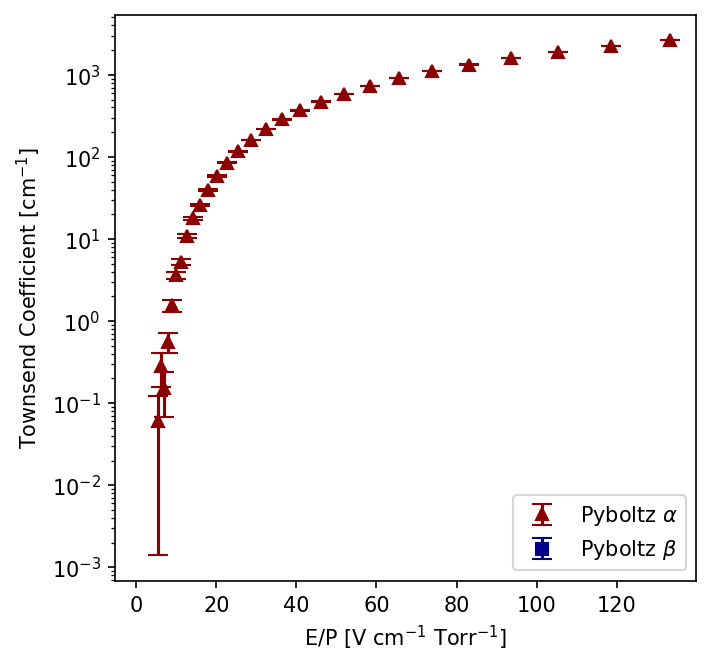

In [6]:
# Plot results of calculation

pylab.figure(figsize=(5,5),dpi=150)
pylab.errorbar(EFields/p,np.array(TownsendAlpha)*770/p,np.array(TownsendAlpha_err)*770/p,capsize=5,fmt='^',label=r'Pyboltz $\alpha$',color='DarkRed')
pylab.errorbar(EFields/p,np.array(Attachment)*770/p,np.array(Attachment_err)*770/p,capsize=5,fmt='s',label=r'Pyboltz $\beta$',color='DarkBlue')

pylab.legend(loc='lower right')
pylab.xlabel(r"E/P [V cm$^{-1}$ Torr$^{-1}$]")
pylab.ylabel(r"Townsend Coefficient [cm$^{-1}$]")
pylab.semilogy()

In [7]:
# Save the data to a text file

pressures=np.ones_like(EFields)*p
dat=pd.DataFrame(np.array([EFields,pressures, TownsendAlpha,TownsendAlpha_err,Attachment,Attachment_err]).transpose(),columns=['EField','Pressure','TownsendAlpha','TownsendAlpha_err','Attachment','Attachment_err'])


In [8]:
# Save data to fill
dat.to_csv("PyBoltz_Argon_1bar.csv")

In [9]:
# Read data from file (in case you want to plot without rerunning PyBoltz)
dat=pd.read_csv("PyBoltz_Argon_1bar.csv")

In [10]:
#Fit the best Townsend empirical params to the calculated coefficient

def tomin(x):
    Aco=x[0]
    Bco=x[1]
    Eps=np.array(dat.EField/p)
    trial= Aco*p*np.exp(-Bco/Eps)
    return sum((trial-dat.TownsendAlpha)**2)

res=minimize(tomin, [12, 180])
AcoBest=res.x[0]
BcoBest=res.x[1]

/usr/local/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-17-2a46bdedb580>:14: RuntimeWarning: divide by zero encountered in log
  pylab.plot(alphafunc(np.log(alphas)),alphas,label='Interpolated Numerical',color='blue')


Text(0.5, 1.0, 'argon (100%)')

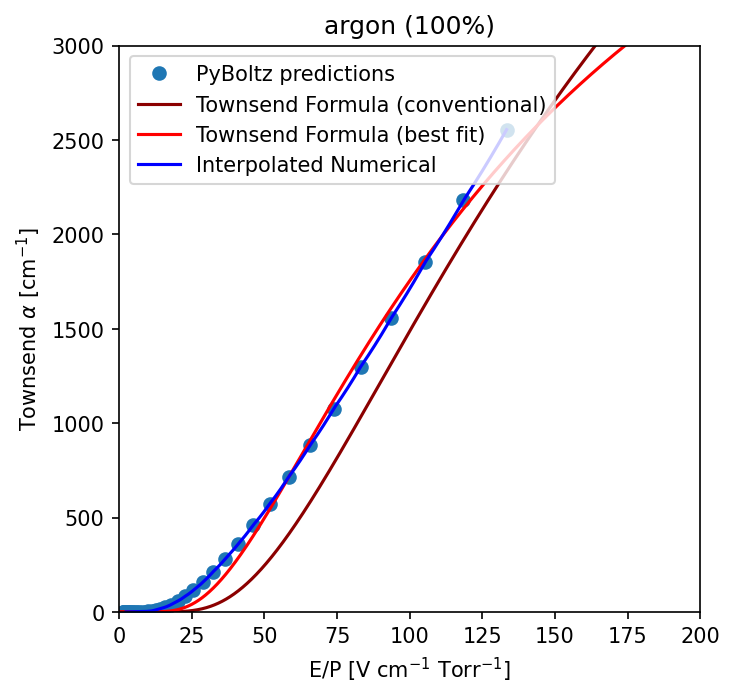

In [17]:
# Plot PyBoltz predictions of alpha against conventional Townsend form for argon

pylab.figure(figsize=(5,5),dpi=150)
EPrange=np.arange(1,550000,100)/p

pylab.plot(dat.EField/p, dat.TownsendAlpha,'o',label='PyBoltz predictions')
pylab.plot(EPrange, Aco*p*np.exp(-Bco/EPrange),color='DarkRed',label='Townsend Formula (conventional)')
pylab.plot(EPrange, AcoBest*p*np.exp(-BcoBest/EPrange),color='red',label='Townsend Formula (best fit)')

alphafunc=interpolate.interp1d(np.log(dat.TownsendAlpha),dat.EField/p,bounds_error=False,fill_value='0')


alphas=np.linspace(0,np.max(dat.TownsendAlpha),1000)
pylab.plot(alphafunc(np.log(alphas)),alphas,label='Interpolated Numerical',color='blue')


pylab.xlabel(r"E/P [V cm$^{-1}$ Torr$^{-1}$]")

pylab.ylabel(r"Townsend $\alpha$ [cm$^{-1}$]")
pylab.legend(loc='upper left')


def MakeGasString(Settings):
    Gases=MySettings['Gases']
    Fractions=MySettings['Fractions']
    GasString=""
    for g in range(0,len(Gases)):
        GasString+=str(Gases[g]).lower()+ " ("+str(round(Fractions[g],2))+"%) / "
    return GasString[:-3]
pylab.xlim(0,200)
pylab.ylim(0,3000)
pylab.title(MakeGasString(MySettings))


In [ ]:
# Values for parameters from literature 
d=1                        # Standard gap spacing 
Aco = 12                   # A for Townsend formula
Bco = 180                  # B for Townsend formula
gammase=0.01               # Secondary electron emission coefficient
ps=np.arange(.4, 1e4, .01) # Pressure range to consider

In [41]:
# Calculate various breakdown criteria

chi=ps*d/p

# The Meek-Raether crtierion using conventional values for the A and B coefficients 
Vb_MeekConventional = d*ps*Bco/(np.log(Aco*ps*d/18.5)) 

# The Meek-Raether crtierion using best fit values the A and B coefficients to the PyBoltz calculation
Vb_MeekBest = d*ps*BcoBest/(np.log(AcoBest*ps*d/18.5)) 

# The Paschen-Townsend criterion using best fit values the A and B coefficients to the PyBoltz calculation
Vb_PaschenTownsendBest = d*ps*BcoBest/(np.log(d*ps*AcoBest/np.log(1+1/gammase))) 

# The Paschen-Townsend criterion using conventional values the A and B coefficients
Vb_PaschenTownsendConventional = d*ps*Bco/(np.log(Aco*ps*d/np.log(1+1/gammase))) 

# The Paschen-Townsend criterion using accurately predicted alpha(E) 
Vb_PyBoltzTownsend = d*ps*alphafunc(np.log(p/(d*ps)*np.log(1+1/gammase)))

# The Meek-Raether criterion using accurately predicted alpha(E) 
Vb_PyBoltzMeek = d*ps*alphafunc(np.log(p/(d*ps)*18.5))


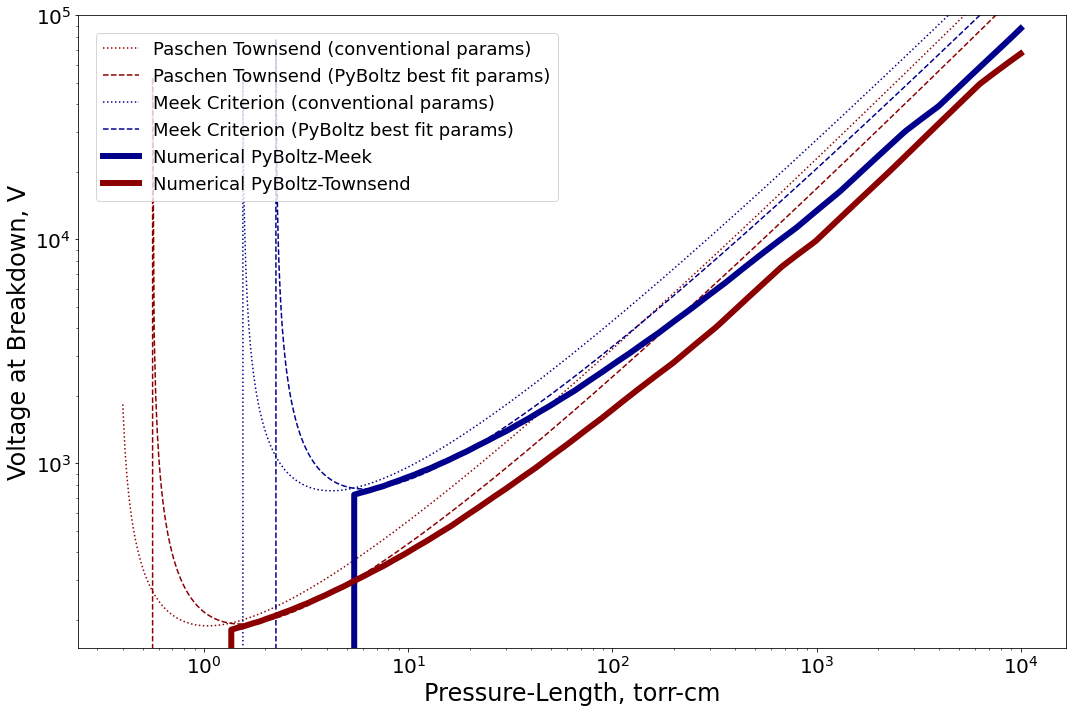

In [42]:
# Argon vs. Theoretical Curve Plotting

fig, ax = pylab.subplots()

ax.set_yscale('log')
ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)


pylab.plot(ps, Vb_PaschenTownsendConventional, ':',label='Paschen Townsend (conventional params)',color='DarkRed')

pylab.plot(ps, Vb_PaschenTownsendBest, '--',label='Paschen Townsend (PyBoltz best fit params)',color='DarkRed')

pylab.plot(ps, Vb_MeekConventional, ':',label='Meek Criterion (conventional params)',color='DarkBlue')

pylab.plot(ps, Vb_MeekBest, '--',label='Meek Criterion (PyBoltz best fit params)',color='DarkBlue')

pylab.plot(ps, Vb_PyBoltzMeek, label='Numerical PyBoltz-Meek',linewidth=6,color='DarkBlue')

pylab.plot(ps, Vb_PyBoltzTownsend, label='Numerical PyBoltz-Townsend',linewidth=6,color='DarkRed')


pylab.xlabel('Pressure-Length, torr-cm', fontsize=24)
pylab.ylabel('Voltage at Breakdown, V', fontsize=24)
pylab.legend(fontsize=18, borderaxespad=1, loc="upper left")
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)

pylab.ylim(150,1e5)
pylab.tight_layout()



pylab.show()